# Interactive Yoga Pose Classifier

## Goals
The target participants of this notebook are people who want to utilize our AI system to predict a specific yoga pose in a photo format. By using this notebook, the participants can gain a deeper understanding of how the program is designed and its implementation. 

## Overview
This project is to use human body tracking and a recognition system to differentiate between different yoga poses and provide an accuracy rating for certain yoga poses submitted by the user. Our goal is for a user to be able to input a picture to our system and receive feedback on what yoga pose they are doing and how accurate their pose is. 

## Working with Jupyter Notebook
This Jupyter notebook consists of mainly two parts: Text description and code segments. The text descriptions give an overall idea of what the code segment is doing and what the input and output values mean in terms of the project. 
The code segments provide a hands-on experience for the participants to interact with the program. To run the code segment, click inside the cell and then press the Run button on the in the menu bar.



In [7]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import os
from random import randint
from os.path import isfile, join
from keras.models import load_model
import A2_Functions as a2


# Backround
## I. Intro To OpenPose Library

To extract information about the human body, we use an open source library called OpenPose. OpenPose does real-time multi-person keypoint detection and multi-threading. 

To better understand how OpenPose works, try running the code below. 



Here's what OpenPose does:


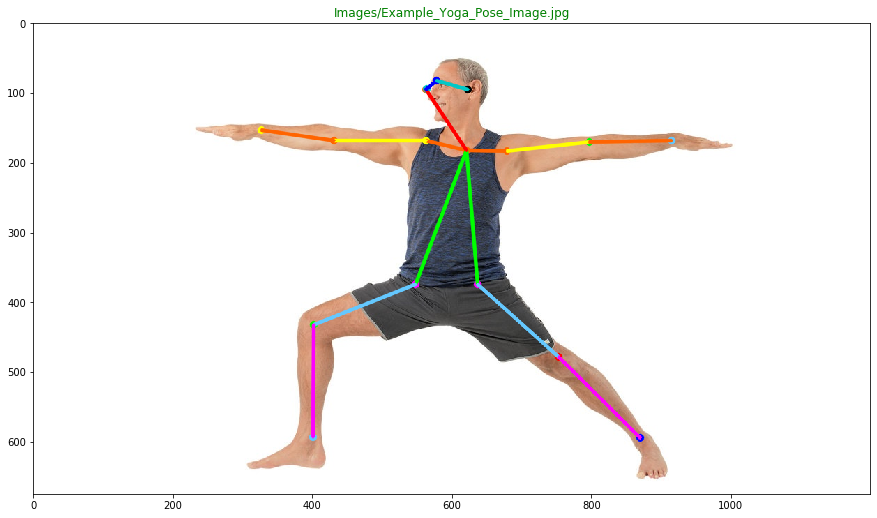

In [2]:
path_to_photo = "Images/Example_Yoga_Pose_Image.jpg"
detected_keypoints, frameClone, image = a2.perform_keypoint_analysis(path_to_photo, True)
plt.figure(figsize=[15,15])
plt.imshow(frameClone[:,:,[2,1,0]])
plt.setp(plt.title(path_to_photo), color="g")
print("Here's what OpenPose does:")

# Now You Try!

Change the following block of code to use a file path to your own photo (.jpg or .png) of a yoga pose and see how well OpenPose can outline the pose.

In [3]:
path_to_photo = "Put your path here!"

if not isfile(path_to_photo):
    print("Make sure you change the first line to point to a .jpg or .png!")
else:
    detected_keypoints, frameClone, image = a2.perform_keypoint_analysis(path_to_photo, True)
    plt.figure(figsize=[15,15])
    plt.imshow(frameClone[:,:,[2,1,0]])
    plt.setp(plt.title(path_to_photo), color="g")
    print("Here's what OpenPose does:")

Make sure you change the first line to point to a .jpg or .png!


## II. Intro to Keras

In order to build the recognition system to differentiate between different yoga poses we built a supervised machine learning model using Keras.

Before we train an AI model, we need to preprocess the input data. OpenPose gives us the coordinates of each KeyPoint - like the right ankle, for example - but we need to scale these points so they are all uniform. Next, we need to randomize the order of the data that we’ve extracted from our training set of photos. It is necessary to shuffle the photos around in order to ensure that our model is being trained without any biases. 

We have trained the model for you - run the next cell to load it into this program so we can play with it.


In [3]:
model = load_model("yoga_pals_model.h5")
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 36)                1332      
_________________________________________________________________
dense_26 (Dense)             (None, 30)                1110      
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 124       
Total params: 2,566
Trainable params: 2,566
Non-trainable params: 0
_________________________________________________________________


# Task
## I. Convert your photo to scaled data points

Now you get an idea of how OpenPose and Keras work, lets try and predict the pose from your image by running the next cell. Before we can predict it, we need to do the same pre-processing that we did on the data set to scale the keypoints.

In [4]:
results = a2.scale_keypoints(path_to_photo)

print("Scaled keypoint data: ")
for index in range(len(results)):
    print("{} : {}".format(a2.features[index], results[index]))


Time Taken in forward pass = 2.4456489086151123
Scaled keypoint data: 
Nosex : 0.4013605442176871
Nosey : 0.022108843537414966
Neckx : 0.5
Necky : 0.17006802721088435
R-Shox : 0.4013605442176871
R-Shoy : 0.14625850340136054
R-Elbx : 0.17687074829931973
R-Elby : 0.14625850340136054
R-Wrx : 0.0
R-Wry : 0.12074829931972789
L-Shox : 0.5986394557823129
L-Shoy : 0.1717687074829932
L-Elbx : 0.7993197278911565
L-Elby : 0.14965986394557823
L-Wrx : 0.923469387755102
L-Wry : 0.8707482993197279
R-Hipx : 0.3758503401360544
R-Hipy : 0.4965986394557823
R-Kneex : 0.12755102040816327
R-Kneey : 0.5952380952380952
R-Ankx : 0.12585034013605442
R-Anky : 0.8690476190476191
L-Hipx : 0.5272108843537415
L-Hipy : 0.4965986394557823
L-Kneex : 0.7244897959183674
L-Kneey : 0.673469387755102
L-Ankx : 0.923469387755102
L-Anky : 0.8707482993197279
R-Eyex : 0.4030612244897959
R-Eyey : 0.02040816326530612
L-Eyex : 0.4268707482993197
L-Eyey : 0.0
R-Earx : -1
R-Eary : -1
L-Earx : 0.5034013605442177
L-Eary : 0.02210884353

### What do these numbers mean?
As you can see from the output, the keypoints are extracted from the photos and scaled from 0-1. If the key points have a value of -1, it means that that specific body part wasn't detected by OpenPose. This is the data that we will be feeding into our model in order for it to make a prediction of the pose.

# Results
## Guess the Pose
Run this cell to see how well our model classified your pose!

In [5]:
predicted_pose = a2.predict_pose(model.predict(np.array([results])))
print("Our model predicted that your pose is: " + predicted_pose)


Our model predicted that your pose is: Warrior 2


#### As you can see, the model was able to identify your pose and hopefully you have a better understanding of how we used these tools to label yoga poses.

Run the last cell to see both your pose and an example of the guessed pose to compare the results.

Compare your pose to an example pose:


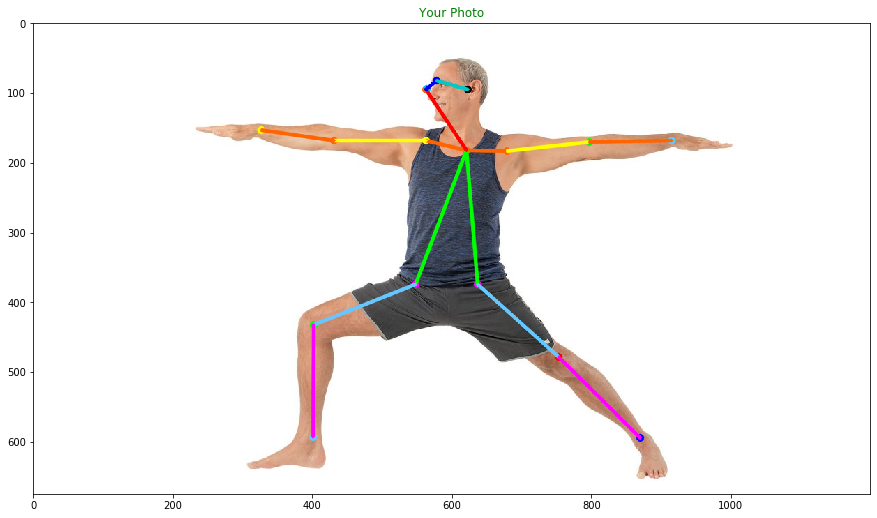

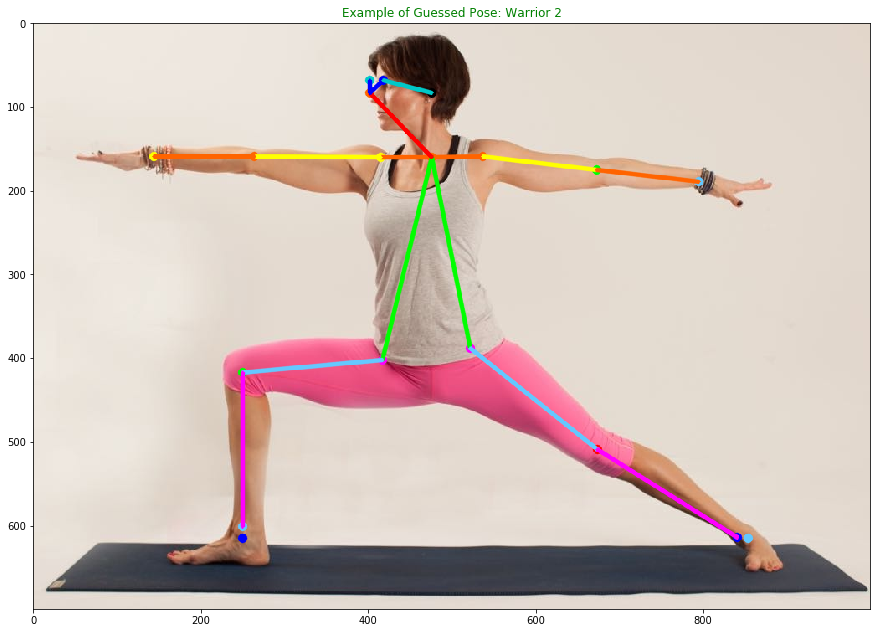

In [6]:
detected_keypoints, frameClone, image = a2.perform_keypoint_analysis(path_to_photo, True)
plt.figure(figsize=[15,15])
plt.imshow(frameClone[:,:,[2,1,0]])
plt.setp(plt.title("Your Photo"), color="g")


detected_keypoints, frameClone, image = a2.perform_keypoint_analysis(a2.labels_dict[predicted_pose], True)
plt.figure(figsize=[15,15])
plt.imshow(frameClone[:,:,[2,1,0]])
plt.setp(plt.title("Example of Guessed Pose: " + predicted_pose), color="g")
print("Compare your pose to an example pose:")

## Additional Resources
1. Introduction on Keras: https://keras.io/
2. Introduction on OpenPose: https://github.com/CMU-Perceptual-Computing-Lab/openpose
3. Published Paper on OpenPose and Key Point Detection: https://arxiv.org/pdf/1812.08008.pdf
4. Pose Trainer: Correcting Exercise Posture using Pose Estimation:
https://www.researchgate.net/publication/324759769_Pose_Trainer_Correcting_Exercise_Posture_using_Pose_Estimation
